In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import calendar
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv('/content/drive/MyDrive/Anshul/salesforcourse-4fe2kehu.csv',index_col='index')

In [89]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,,,,,,,,,,,,,,,
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34867 entries, 0 to 34866
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Year              34866 non-null  float64
 2   Month             34866 non-null  object 
 3   Customer Age      34866 non-null  float64
 4   Customer Gender   34866 non-null  object 
 5   Country           34866 non-null  object 
 6   State             34866 non-null  object 
 7   Product Category  34866 non-null  object 
 8   Sub Category      34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit Cost         34866 non-null  float64
 11  Unit Price        34866 non-null  float64
 12  Cost              34866 non-null  float64
 13  Revenue           34867 non-null  float64
 14  Column1           2574 non-null   float64
dtypes: float64(8), object(7)
memory usage: 4.3+ MB


In [91]:
#dropping the column with NaN values
df.drop('Column1', axis=1,inplace=True)

In [92]:
#getting the nan values
na_mask=df.isna().any(axis=1)
df2=df[na_mask]

In [93]:
df2

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
index,,,,,,,,,,,,,,
34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095


In [94]:
#dropping the rows with NaN values
df.dropna(axis=0,inplace=True)
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
index,,,,,,,,,,,,,,
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


<Axes: >

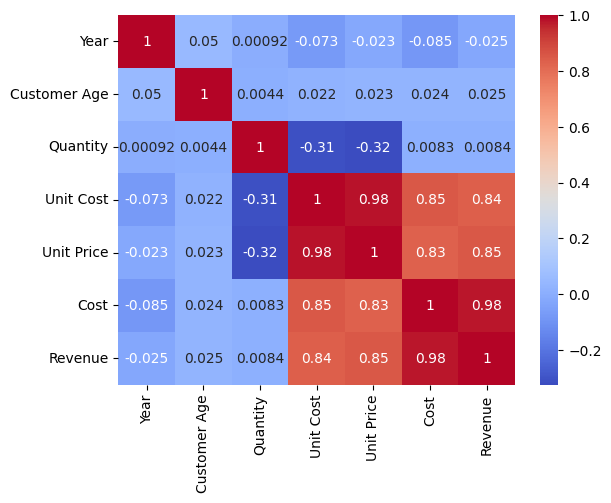

In [95]:
# Plotting the heatmap to understand the relation between columns
cm=df.corr(numeric_only=True)
sns.heatmap(cm, annot=True, cmap='coolwarm')

Customer Demographics

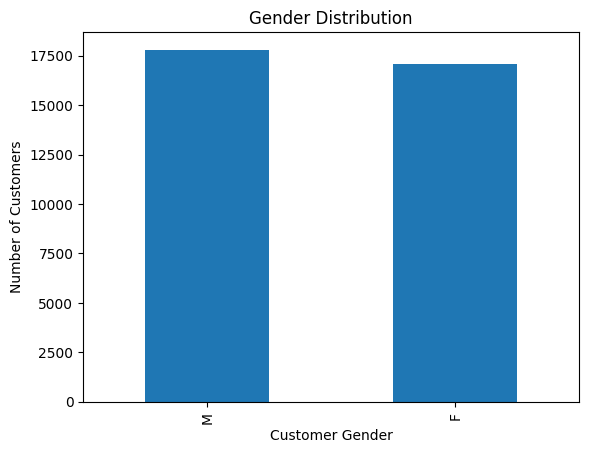

In [96]:
df['Customer Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.ylabel('Number of Customers')
plt.show()

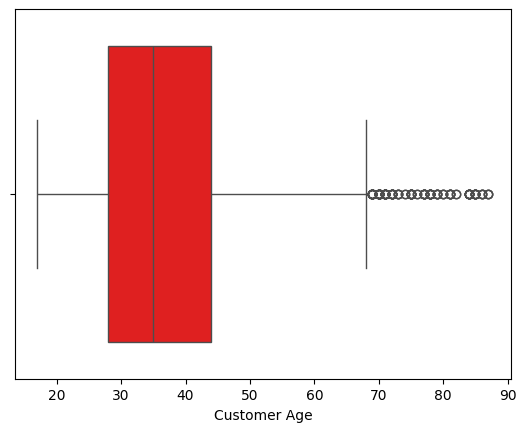

In [97]:
#Plotting box plot for age analysis
sns.boxplot(df['Customer Age'],orient='h',color='red')
plt.show()

bins
(0, 20]      2009
(20, 40]    21082
(40, 60]    10971
(60, 80]      772
dtype: int64


Text(0.5, 1.0, 'Customer Age distribution')

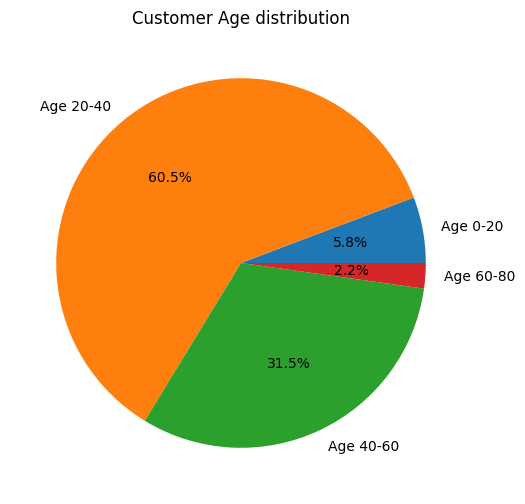

In [98]:
# df['Customer Age'].value_counts().plot(kind='bar',figsize=(10,8))
df['Customer Age']=pd.to_numeric(df['Customer Age'],downcast='integer')
df['bins']=pd.cut(df['Customer Age'],bins=[0,20,40,60,80])
labels=['Age 0-20','Age 20-40','Age 40-60','Age 60-80']
df_pie=df.groupby('bins').size()
print(df_pie)
df_pie.plot.pie(subplots=True,figsize=(10,6),labels=labels, autopct='%.1f%%')
plt.title('Customer Age distribution')

Product Distribution

<Axes: title={'center': 'Product Distribution'}, xlabel='Product Category'>

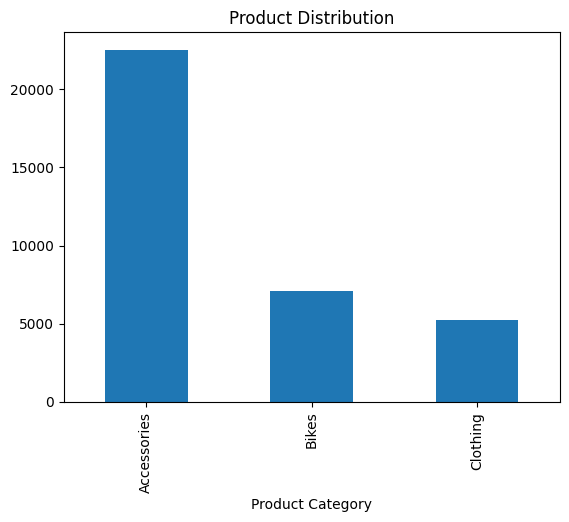

In [99]:
df['Product Category'].value_counts().plot(kind='bar', title='Product Distribution')

In [100]:
# df['Sub Category'].value_counts().plot(kind='barh', title='Product Subcategory', figsize=(8,6))
# plt.show()

In [101]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,bins
index,,,,,,,,,,,,,,,
0,2/19/2016,2016.0,February,29,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,"(20, 40]"
1,2/20/2016,2016.0,February,29,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,"(20, 40]"
2,2/27/2016,2016.0,February,29,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,"(20, 40]"
3,3/12/2016,2016.0,March,29,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,"(20, 40]"
4,3/12/2016,2016.0,March,29,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,"(20, 40]"


   Product Category    Sub Category  Count
8             Bikes  Mountain Bikes   2737
9             Bikes      Road Bikes   3022
10            Bikes   Touring Bikes   1334


Text(0.5, 1.0, 'Subcategories by product categories')

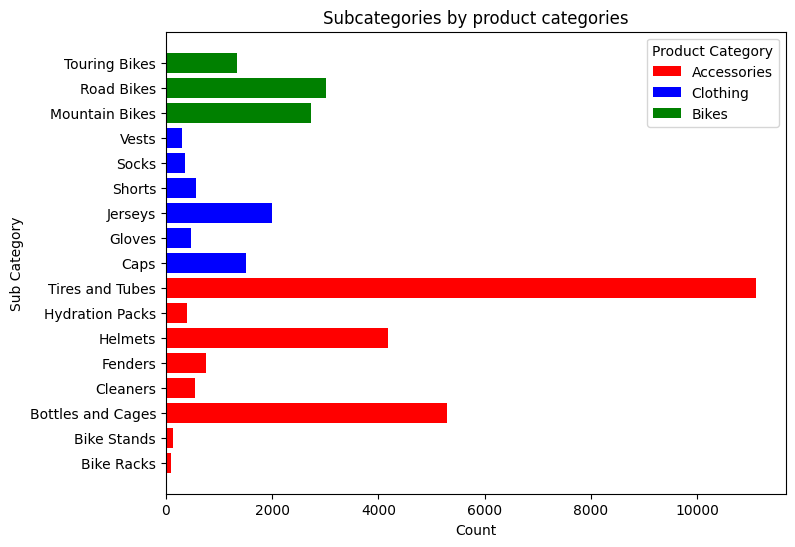

In [102]:
categories=df['Product Category'].unique()
colors={cat: 'red' if cat=='Accessories' else 'blue' if cat=='Clothing' else 'green' for cat in categories}
df_product=df.groupby(['Product Category','Sub Category']).size().reset_index(name='Count')

fig, ax=plt.subplots(figsize=(8,6))
for category, color in colors.items():
  subset=df_product[df_product['Product Category']==category]
  ax.barh(subset['Sub Category'], subset['Count'],color=color, label= category)

print(subset)
ax.legend(title='Product Category')
ax.set_xlabel('Count')
ax.set_ylabel('Sub Category')
ax.set_title('Subcategories by product categories')

Country and States

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'California'),
  Text(1, 0, 'England'),
  Text(2, 0, 'Washington'),
  Text(3, 0, 'Oregon'),
  Text(4, 0, 'Saarland'),
  Text(5, 0, 'Nordrhein-Westfalen'),
  Text(6, 0, 'Hessen'),
  Text(7, 0, 'Seine (Paris)'),
  Text(8, 0, 'Hamburg'),
  Text(9, 0, 'Seine Saint Denis')])

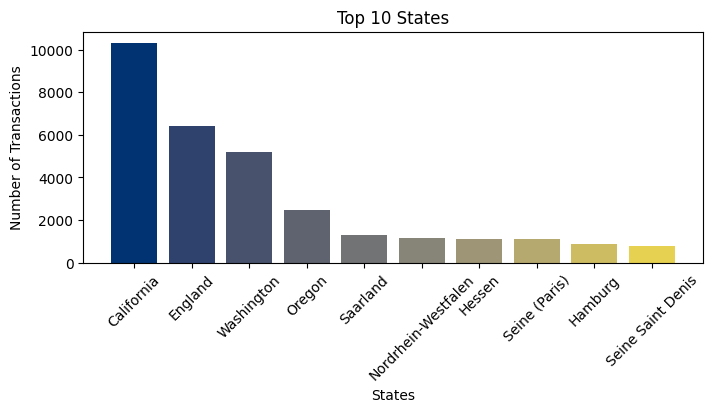

In [103]:
#Top 10 states with the most transaction from around the world
state_count=df['State'].value_counts().head(10)
palette=sns.color_palette('cividis',len(state_count))

plt.figure(figsize=(8,3))
plt.bar(state_count.index, state_count,color=palette)
plt.title('Top 10 States')
plt.xlabel('States')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

In [104]:
df.drop(columns=['bins'], inplace=True)


Revenue, Cost and Profit

In [105]:
#adding the profit column
df['Profit']=df['Revenue']-df['Cost']
matplotlib.rcParams["axes.formatter.limits"] = (-99, 99)

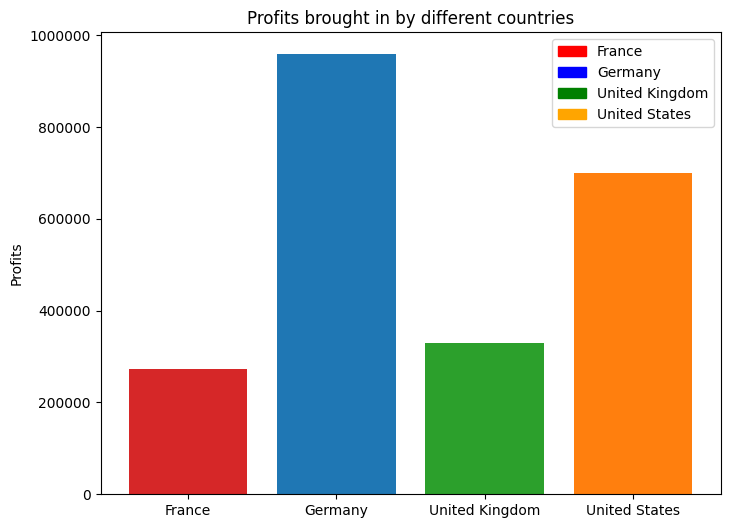

In [106]:
df_profit=df.groupby('Country')['Profit'].sum().reset_index()
fig, ax=plt.subplots(figsize=(8,6))

colors={'France':'red', 'Germany':'blue','United Kingdom':'green','United States':'orange'}
labels=list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax.bar(df_profit['Country'], df_profit['Profit'],color=bar_colors)
ax.set_ylabel('Profits')
ax.set_title('Profits brought in by different countries')
ax.legend(handles, labels)

In [107]:
df['Date']=pd.to_datetime(df['Date'])

In [108]:
df['month']=df['Date'].dt.month

df_revenue=df.groupby('month')[['Revenue','Profit']].sum().reset_index()


In [109]:
month_count=df['Month'].value_counts()
month_percentage=df['Month'].value_counts(normalize=True)*100
freq_table_month=pd.DataFrame({'Frequency':month_count,'Percentage':month_percentage})
freq_table_month

,Frequency,Percentage
Month,,
June,3680,10.554695
May,3676,10.543223
December,3414,9.791774
April,3283,9.416050
March,3155,9.048930
January,2907,8.337636
February,2887,8.280273
October,2554,7.325188
November,2488,7.135892


In [110]:
l1=list(df_revenue['month'].unique())
for i in l1:
  df_revenue['month'][i-1]=calendar.month_name[i]


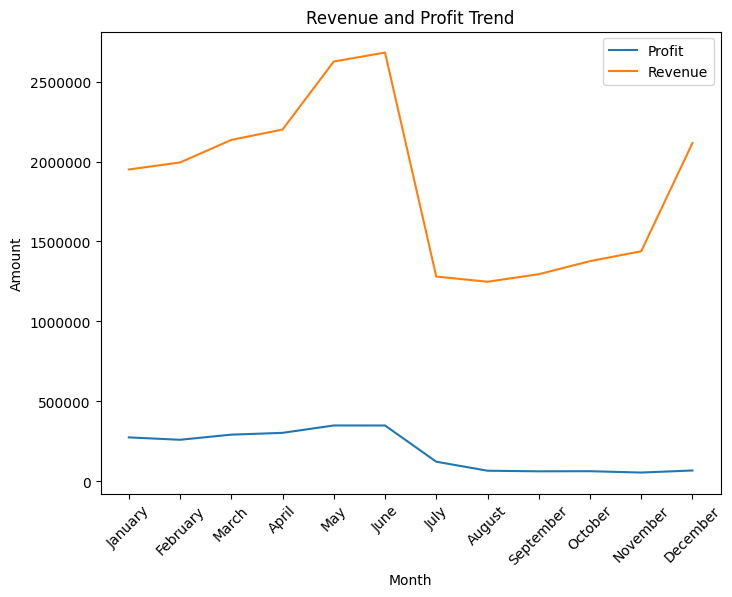

In [111]:
#plotting revenue and profit trend

fig,ax=plt.subplots(figsize=(8,6))
columns=list(df_revenue.columns)
bottom=[0]*len(df_revenue)
ax.plot(df_revenue['month'],df_revenue['Profit'],label='Profit')
ax.plot(df_revenue['month'],df_revenue['Revenue'], label='Revenue')
ax.legend()
plt.title('Revenue and Profit Trend')
plt.ylabel('Amount')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()